Table of Contents

Preface


1 – Look at the Big Picture

2- Machine Learning Formation

3– Business Constraints

4 – Dataset Backround

5 – Literature Review

6- Performance Metrics

7 – Get the Data

8– Discover & Visualize the Data to gain Insights

9- Handling Missing Values

10- Eda Takeaway

11- Principal Component Analysis

12- Prepare Our Models

10- Conclusion

11 - References

In [1]:
from IPython.display import HTML

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
def generate_harvard_citation(author,year,title,url,access_date):
    citation= f'{author},{year}.{title}..Available at: {url} [Accesed] {access_date}]'
    return citation

In [3]:
# Example usage
author = "Michelangiolo Mazzeschi"
year = "2021"
title ='Exploring Dataset With Data Visualization: Wine Classification Using PCA'
url = "https://medium.com/towards-artificial-intelligence/exploring-dataset-with-data-visualization-wine-classification-using-pca-d133427183fb"
access_date = "03-11-2023"
citation = generate_harvard_citation(author, year, title, url, access_date)
print(citation)

Michelangiolo Mazzeschi,2021.Exploring Dataset With Data Visualization: Wine Classification Using PCA..Available at: https://medium.com/towards-artificial-intelligence/exploring-dataset-with-data-visualization-wine-classification-using-pca-d133427183fb [Accesed] 03-11-2023]


# The Big Picture

We have been tasked by a haulage company to analyse a dataset collected from their scania truck fleet which are used daily. They advise that it is essential to reduce maintance costs as a result of breakdowns during daily operations. They advise us some of these breakdowns are  due to the failure of the air pressure system. They have asked by using Data Analytics can we use the dataset to reduce these costs.

We advise that it may be possible to build a predictive model that may help in identfying the compontents that are and are not linked to the breakdown of the air pressure system. This may help them to arrange maintance schedules to insure the optium functioning of their fleet.

The air pressure system in heavy duty trucks use  compressed air to keep the brake pads open,if this system fails the brakes will engage and the truck will come to an complete stop. The advantage of this system over a  hydraulic system is that is easyily available and cost effective. There have been instances were failures of air pressure systems have led to human fatalies as a result the cost of misclassification is high. As our EDA will ultimatley lead to a machine learing predictive model being produced the cost of misclassification it is something we need to be aware off. 

# Machine Learning Formation

This is a binary classification problem. We are presented with two classes postive & negative. The postive class informs us that the failure was due to a specific component of the APS system, the negative class informs us that the failure has to do with other components within the truck. Therefore we would propose that it may be possible to build a machine learning model that predicts what sensors are related to the failure of the APS system.
Rithwik Shetty,2021. Predicting a Failure in Scania’s Air Pressure System.[Online Course] .Available at: https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

# Business Constraints

Latency the time taken to detect a failure in the APS system must be low to avoid an increase in maintenance costs.

We need to consider how we clasify our results. If we build a model which classifies our data incorrectly this could lead to the breakdown of a truck leading to increase maintance costs

In the literature review they have stated that the cost of breakdown is ten times higher that predictive maintance

# Dataset Backround

There are over 60.000 datapoints and 171 features within our Dataset. This then can be classed as a high dimensional dataset. This could lead to the curse of dimensionality which may cause problems. in a high dimensional space such as our dataset the concept of distance between data points become less meaningful. It is difficult to find a pattern in the data due to the amount of features.The model starts capturing noise with the data rather than the pattern within the data. One tool to deal with thisproblem is Princpial Component Analysis (PCA) this tool allows us to reduce the features to a lower dimensional space thereby allowing us to identify patterns within our data.

While we will use PCA to reduce out features it may not be the optimal solution for our problem. The dataset contains over 170 features which give us readings from components within the truck, some measurements relate to the APS system, some do not. Our model needs to identify which components are likely to fail. Here we run into no free lunch theorom PCA will allow us to reduce our features but we lose the ability to interpret which components are related to the breaakdown of the APS brake system. 

Another problem we need to be aware is there is a lot of missing data. This data is classified as missing completely at random(MCAR) as there is no relationship with the missing data point or other data within the dataset, we will use suitable imputation methods to resolve this.

We also have an imbalanced class feature  over 59,000 data points relate to the negative class. This could mean our model could guess and end up with a 90% accurracy but would not work well with new data. 


# Literature Review

Cerqueira, Vítor, et al. “Combining Boosted Trees with Metafeature Engineering for Predictive Maintenance.” International Symposium on Intelligent Data Analysis. Springer, Cham, 2016.

This paper mentions that the authors’ approach to this problem consists of 4 steps. (i) A filter that excludes a subset of features and data points based on the number of missing values; (ii) A metafeature engineering procedure used to create new features based on existing information; (iii) a biased sampling method to deal with class imbalance problem (SMOTE); and (iv) use of boosted trees for classification.

Features having a high percentage of missing values were removed. During their analysis, they found that some features had an extremity of 80% data missing, and 8 out of 170 features had more than 50% missing values. After removing the said features, it was seen that there were duplicate data points, indicating that the removed features have a little effect in getting a good score.

They mentioned that they are treating the problem as an Anomaly Detection problem since the positive class of the data are characterized by rare events in the domain. They used BoxPlot Analysis (for each feature, compare each value to the typical value found in that feature), Local Outlier Factor (compare data point to it’s local neighborhood through density estimation) and Hierarchical Agglomerative Clustering (each step merges two similar group, and the last observation that are merged might be an outlier) for their metafeature engineering.

SMOTE is a method of duplicating the data points of the minority class of the imbalanced dataset, to balance it out. The use of SMOTE + MetaFeature Engineering with XGBOOST library was seen to give the best result.

https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

Costa, Camila Ferreira, and Mario A. Nascimento. “IDA 2016 Industrial Challenge: Using Machine Learning for Predicting Failures.” International Symposium on Intelligent Data Analysis. Springer, Cham, 2016.

The authors tried different algorithms, namely, Logistic Regression, K-NN, SVM, Decision Trees and Random Forests to solve the problem. They handled the missing data by implementing the Soft-Impute Algorithm. It is a large scale matrix completion algorithm that replaces missing values with current guesses and solves an optimization problem. The imbalance data was handled by setting a high threshold (cut-off) value, meaning the model will predict a negative class only if it is extremely sure.

The final result showed that Random Forest performed the best, giving a Total Cost (given metric) that was 92.56% lesser than their baseline model. The KNN model was the second best classifier with 90.84% improvement, and the Logistic Regression model worked well with 88.72% improvement. The SVM with RBF Kernel improved the total cost by just 86.36%.

This paper compares the performance of different models, on data whose missing values were imputed using more complex algorithms rather than simple mean/median. We see that Ensemble models will work well to tackle this problem, and a high threshold value plays a key role in handling imbalanced data.

https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]



# Performance Metrics

For this project, our performance statistic of choice will be the Macro-F1 Score. The F1 scores for each class are factored into the macro F1 score. It might be useful in demonstrating to us how well our model performs depending on the quantity of correctly identified points for each class. This is helpful because misclassification can be highly costly because an undetected APS breakdown can cause the truck to malfunction while in service and raise maintenance expenses.

https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

# Get The Data

In [4]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from tqdm import tqdm
import missingno as msno
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore') 


C:\Users\andrew\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
# Read the dataset
train = pd.read_csv('aps_failure_set.csv',na_values=["na"])

# Show first 5 records
train.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,NaN,2.130706e+09,156.0,0.0,0.0,0.0,0.0,0.0,...,627610.0,376028.0,931828.0,1035236.0,674626.0,161266.0,3284.0,0.0,0.0,0.0
59991,neg,39308,NaN,4.520000e+02,374.0,0.0,0.0,0.0,0.0,0.0,...,312426.0,161694.0,323438.0,292350.0,250112.0,157636.0,234932.0,9506.0,0.0,0.0
59992,neg,14,0.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,...,132.0,44.0,80.0,52.0,54.0,0.0,0.0,0.0,0.0,0.0
59993,neg,0,2.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train.shape

(60000, 171)

In [7]:
train.describe(include='all')




,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,NaN,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,NaN,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,NaN,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000


Observation - We can observe from the above data that we have numerous missing values, we can also observe between the minimum and maximum values. this is important to know as it informs if we have to scale our data and what imputation we use to fill in our missing data. 

In [8]:
print("Total number of Train datapoints: ",train.shape[0])
print("Total number of features: ",train.shape[1])

print("The column/feature names given are:\n ",list(train.columns))

Total number of Train datapoints:  60000
Total number of features:  171
The column/feature names given are:
  ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'c

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


Observation - we can see from our descriptive stats there are a number of issuses. With 60,000 attribures and 171 features we have a high dimensional dataset. We have a high amount of missing values which need to be dealt with prior to machine learning

# Discover & Visualize Data to Gain Insights

In [10]:
constant_features=[col for col in train.columns if train[col].nunique()==1]
train.drop(columns=constant_features, inplace=True)
train.shape

(60000, 170)

Observation we have used the function to remove single value features as these are features with the values are not useful to us. We can see we have reduce our featues by 11 columns.

In [11]:
def get_correct_label(y):
    """
    This function converts the class labels
    from 'neg' and 'pos' to 0 and 1 respectively
    """
    return y.replace(['neg','pos'],[0,1])

print(train['class'].unique())
train['class'] = get_correct_label(train['class'])
print(train['class'].unique())

['neg' 'pos']
[0 1]


In [12]:
train['class'].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

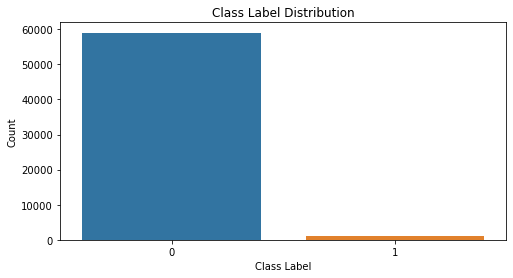

The number of positive class points is:  1000
The number of negative class points is:  59000


In [13]:
plt.figure(figsize=(8,4))
sns.barplot(train['class'].unique(),train['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('The number of positive class points is: ',train['class'].value_counts()[1])
print('The number of negative class points is: ',train['class'].value_counts()[0])

Observation- we can observe we have an unbalanced class labels. We can deal with this in different ways we can use an undersampling, oversampling methods. we could use Smote to syntically increase our postive class. Another method we can use is to increase out thesholds to insure the model will only select a negative class if is sure it is only negative.

# Handling Misssing Values

we have previously observed a high degree amount of missingness in our data.We have a number of options open to us, we could drop the missing data.impute with the mean or use knn nearest neighbours to deal with our missing data.

In [14]:
# Creating a dictionary whose keys are the column names and values are the percentage of missing values
nan_count = {k:(v / train.shape[0])*100 for k,v in train.isna().sum().items()}
# Sorting the dictionary in descending order based on the percentage of missing values
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}

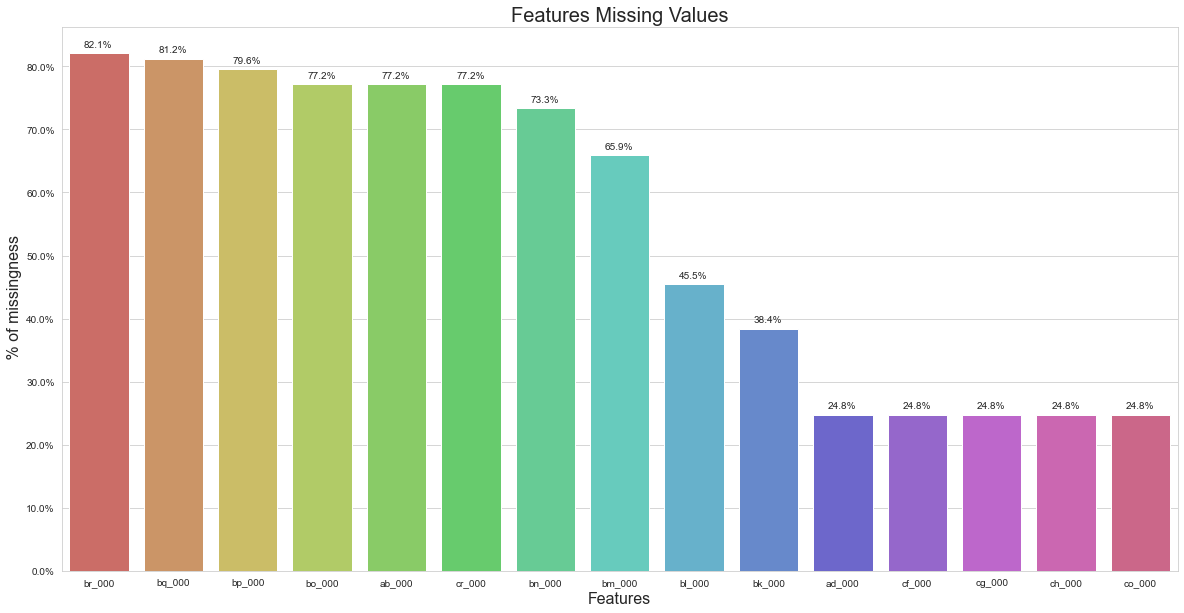

In [15]:
# Plotting a graph showing the top 15 features having highest percentage of missing values 
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))

# Bar Plot
plot = sns.barplot(x= list(nan_count.keys())[:15],y = list(nan_count.values())[:15],palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.title('Features Missing Values',fontsize=20)
plt.ylabel(" % of missingness", fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.show()

Rithwik Shetty,2021. Predicting a Failure in Scania’s Air Pressure System..Available at: https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 27-10-2023]

Observation We can see from the above graph that are features over 50% missing values we will need to deal them before we to our machine model

In [16]:
def remove_na(train,nan_feat_threshold=0.05,col_threshold=0.7):
    nan_count=train.isna().mean()
    nan_feat=nan_count[nan_count < nan_feat_threshold].index
    train=train.dropna(subset=nan_feat)
    train=train.dropna(axis=1, thresh=col_threshold * train.shape[0])
    train=train.reset_index(drop=True)
    return train

cleaned_df=remove_na(train,nan_feat_threshold= 0.05, col_threshold=0.7)



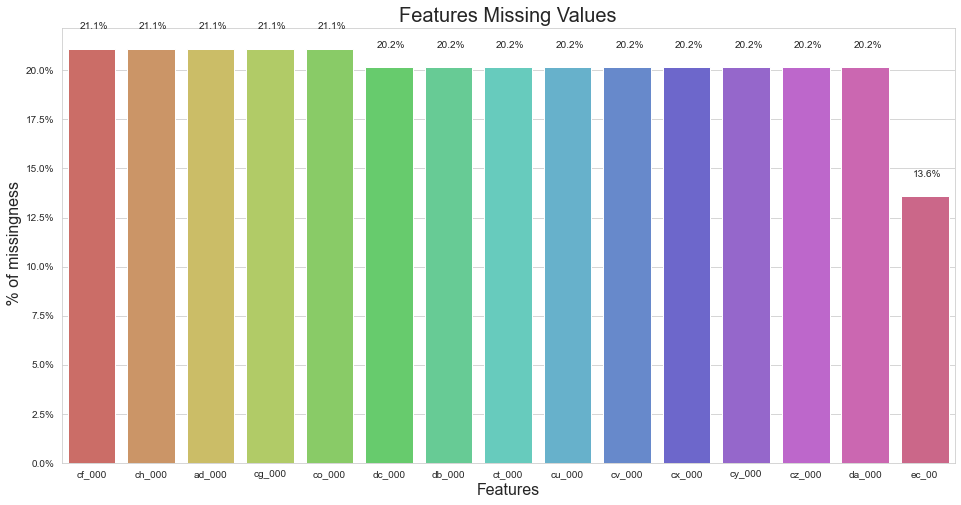

In [17]:
# Plotting a graph showing the top 15 features having highest percentage of missing values 
nan_count_cleaned=cleaned_df.isna().mean()* 100
top_nan_count_cleaned= nan_count_cleaned.sort_values(ascending=False).head(15)

sns.set_style(style="whitegrid")
plt.figure(figsize=(16,8))

# Bar Plot
plot = sns.barplot(x=top_nan_count_cleaned.index, y=top_nan_count_cleaned.values,palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.title('Features Missing Values',fontsize=20)
plt.ylabel(" % of missingness", fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.show()

Observation we have removed fetures with over 70% missing values and under 5% missing values. The reason for this is if a feature has over 70% of data issing it is not any good to us and if data has only 5% data it will be difficult for any imputation to work. We will impute the rest of the missing data using k nearest neighbours prior to implenting PCA.

In [18]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import numpy as np

def imputation(train, mis_col):
    """
    This function imputes Missing values 
    using Median on given features, and
    Model-Based Imputation on the rest
    """
    if 'class' in median_imputed_features:
        median_imputed_features.remove()
    
    # Using sklearn's SimpleImputer
    median_imputer = SimpleImputer(missing_values=np.NaN, strategy='median', copy=True)
    median_df = median_imputer.fit_transform(train[mis_col])
    train1 = train.copy()
    train1[mis_col] = median_df

    # Performing Model-Based Imputation
    mice_imputer = IterativeImputer(estimator=Ridge(random_state=0), random_state=0)
    imputed_df = pd.DataFrame(data=mice_imputer.fit_transform(train), columns=train1.columns)

    return imputed_df, median_imputer, mice_imputer

# List of feature names that have missing values between 5% to 15%.
# We will impute the missing values in features with their median
median_imputed_features = [k for k, v in nan_count.items() if v >= 5 and v < 15]

# Example usage of the imputation function:
# imputed_train, median_imputer, mice_imputer = imputation(train, median_imputed_features)

imputed_train, median_imputer, mice_imputer = imputation(train, median_imputed_features)

# Print the first few rows of the imputed DataFrame to inspect the data
print(imputed_train.head())

# To see summary statistics of the DataFrame, you can use the describe() method
print(imputed_train.describe())

#unknown,unknown.Imputation..Available at: Ref:https://scikit-learn.org/stable/modules/impute.html#iterative-imputer [Accesed] 27-10-2023]

   class   aa_000     ab_000        ac_000         ad_000  ae_000  af_000  \
0    0.0  76698.0  13.273626  2.130706e+09     280.000000     0.0     0.0   
1    0.0  33058.0  29.447863  0.000000e+00  191777.195723     0.0     0.0   
2    0.0  41040.0   2.733367  2.280000e+02     100.000000     0.0     0.0   
3    0.0     12.0   0.000000  7.000000e+01      66.000000     0.0    10.0   
4    0.0  60874.0  -5.774479  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   7322

Observation- We have dealt with misssing values in our dataset by using median and mice imputer.The benefits of this is if we feel we have missing data with different values we can benefit from using the strenghts of each imputation method.

From my initial EDA I feel it is unlikely the relationship and patterns of our missing data will not be captured by simple imputation methods.

The mice imputation method has advantages such as being able to handle highly complex data, improved accurracy & reduced bias. As it is model based it is data driven. It also allows to use different estimators we have use ridge, but we could have used a RANSAC regressor which can handle highly skewed data. 



In [20]:
imputed_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,13.273626,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,29.447863,0.000000e+00,191777.195723,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,2.733367,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,-5.774479,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [21]:
missing_counts=imputed_train.isnull().sum()
print(missing_counts)

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64


In [22]:
imputed_train.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,13.273626,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,29.447863,0.000000e+00,191777.195723,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,2.733367,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,-5.774479,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [23]:
train=imputed_train

In [24]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,13.273626,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,29.447863,0.000000e+00,191777.195723,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,2.733367,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,-5.774479,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X=train.drop(columns=['class'])
y=train['class']
k=15
selector=SelectKBest(score_func=f_classif,k=k)
X_new=selector.fit_transform(X,y)
selected_feature_indices= selector.get_support(indices=True)
selected_feature_names=X.columns[selected_feature_indices]
selected_features=pd.DataFrame(X_new,columns=selected_feature_names)
selected_features['class']= y.values

unknown,unknown.Feature selection..Available at: https://scikit-learn.org/stable/modules/feature_selection.html [Accesed] 27-10-2023]

Observation- We have completed a first look of our data using descriptive stats. We have 170 features it will be difficult to carry out further analysis without reducing features. We could use a dimensionality reduction such as Princpial Component Analysis however we would lose the ability to interpret and understand how our individual features relate to each other and our target variable.

Witin scikit libary we have function that allow us to reduce our dataset to the most important features, We have used SelectKBest to the top 15 features. We can now complete our EDA

In [26]:
selected_features.head(2)

,aa_000,ah_000,an_000,ao_000,ap_000,aq_000,bb_000,bg_000,bj_000,bt_000,bu_000,bv_000,by_000,ci_000,cq_000,class
0,76698.0,2551696.0,4933296.0,3655166.0,1766008.0,1132040.0,6700214.0,2551696.0,799478.0,76698.08,6700214.0,6700214.0,43566.0,5245752.00,6700214.0,0.0
1,33058.0,1393352.0,2560898.0,2127150.0,1084598.0,338544.0,3646660.0,1393352.0,392208.0,33057.51,3646660.0,3646660.0,17733.0,2291079.36,3646660.0,0.0


In [27]:
selected_features.columns

Index(['aa_000', 'ah_000', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'bb_000',
       'bg_000', 'bj_000', 'bt_000', 'bu_000', 'bv_000', 'by_000', 'ci_000',
       'cq_000', 'class'],
      dtype='object')

In [28]:
selected_features.describe()

,aa_000,ah_000,an_000,ao_000,ap_000,aq_000,bb_000,bg_000,bj_000,bt_000,bu_000,bv_000,by_000,ci_000,cq_000,class
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000
mean,5.933650e+04,1.809841e+06,3.460245e+06,3.001517e+06,1.004444e+06,4.425640e+05,4.526178e+06,1.809266e+06,5.102646e+05,5.933650e+04,4.515325e+06,4.515325e+06,2.198481e+04,3.484054e+06,4.515325e+06,0.016667
std,1.454301e+05,4.163287e+06,7.749227e+06,6.788605e+06,3.072067e+06,1.257565e+06,1.082806e+07,4.157943e+06,1.812352e+06,1.454301e+05,1.079719e+07,1.079719e+07,5.381053e+04,8.344845e+06,1.079719e+07,0.128020
min,0.000000e+00,-2.974208e+06,-1.056485e+07,-2.933051e+07,-1.717930e+06,-3.344752e+06,0.000000e+00,-4.018810e+06,-8.571747e+06,-4.566237e-01,0.000000e+00,0.000000e+00,-7.121466e+04,-1.633450e+04,0.000000e+00,0.000000
25%,8.340000e+02,3.053300e+04,7.471150e+04,6.673600e+04,2.577400e+04,4.237500e+03,1.075705e+05,3.053400e+04,8.683500e+03,8.341225e+02,1.075815e+05,1.075815e+05,2.200000e+02,4.900872e+04,1.075815e+05,0.000000
50%,3.077600e+04,1.014488e+06,1.944736e+06,1.661120e+06,3.646990e+05,1.819140e+05,2.388194e+06,1.014604e+06,1.566170e+05,3.077694e+04,2.389666e+06,2.389666e+06,1.272200e+04,1.860124e+06,2.389666e+06,0.000000
75%,4.866800e+04,1.642751e+06,3.206749e+06,2.730658e+06,7.438435e+05,3.826765e+05,3.962532e+06,1.642435e+06,3.419575e+05,4.866735e+04,3.963754e+06,3.963754e+06,2.054625e+04,2.950099e+06,3.963754e+06,0.000000
max,2.746564e+06,7.424732e+07,1.408618e+08,1.222018e+08,7.793494e+07,2.556265e+07,1.928715e+08,7.424732e+07,4.573632e+07,2.746565e+06,1.928715e+08,1.928715e+08,1.002003e+06,1.409861e+08,1.928715e+08,1.000000


features=['aa_000', 'ah_000', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'bb_000','bg_000', 'bj_000', 'bt_000', 'bu_000', 'bv_000', 'by_000', 'ci_000', 'cq_000']

class_0_data = selected_features[selected_features['class']==0]
class_1_data = selected_features[selected_features['class']==1]

feature_stats= {}

for feature in features:
    mean_class_0 = class_0_data[feature].mean()
    std_dev_class_0 = class_0_data[feature].std()
    
    mean_class_0 = class_0_data[feature].mean()
    std_dev_class_0 = class_0_data[feature].std()
    
    feature_stats[feature]= {
        'Class 0': {'Mean': mean_class_0, 'Standard Deviation': std_dev_class_0},
        'Class 1': {'Mean': mean_class_1, 'Standard Deviation': std_dev_class_1},
    }
    
    for feature, stats in feature_stats.items():
        print(f'Feature:{feature}')
        print('Class 0 - Mean:', stats['Class 0']['Mean'], 'Standard Deviation;', stats['Class 0']['Standard Deviation'])
        print('Class 1 - Mean:', stats['Class 1']['Mean'], 'Standard Deviation;', stats['Class 1']['Standard Deviation'])

I ran this code and it workrd however i seem to be hitting an error message which I cannot resolve. The data originally showed there was a big difference between the mean and the standard deviation indicating that our data is skewed.

tps://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

Text(0.5, 1.0, 'Class Distribution')

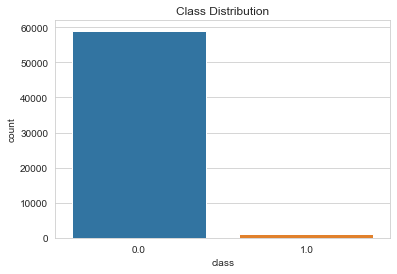

In [29]:
sns.countplot(data=selected_features,x='class')
plt.title('Class Distribution')

Text(0.5, 1.0, 'Pairplot of Selected Features')

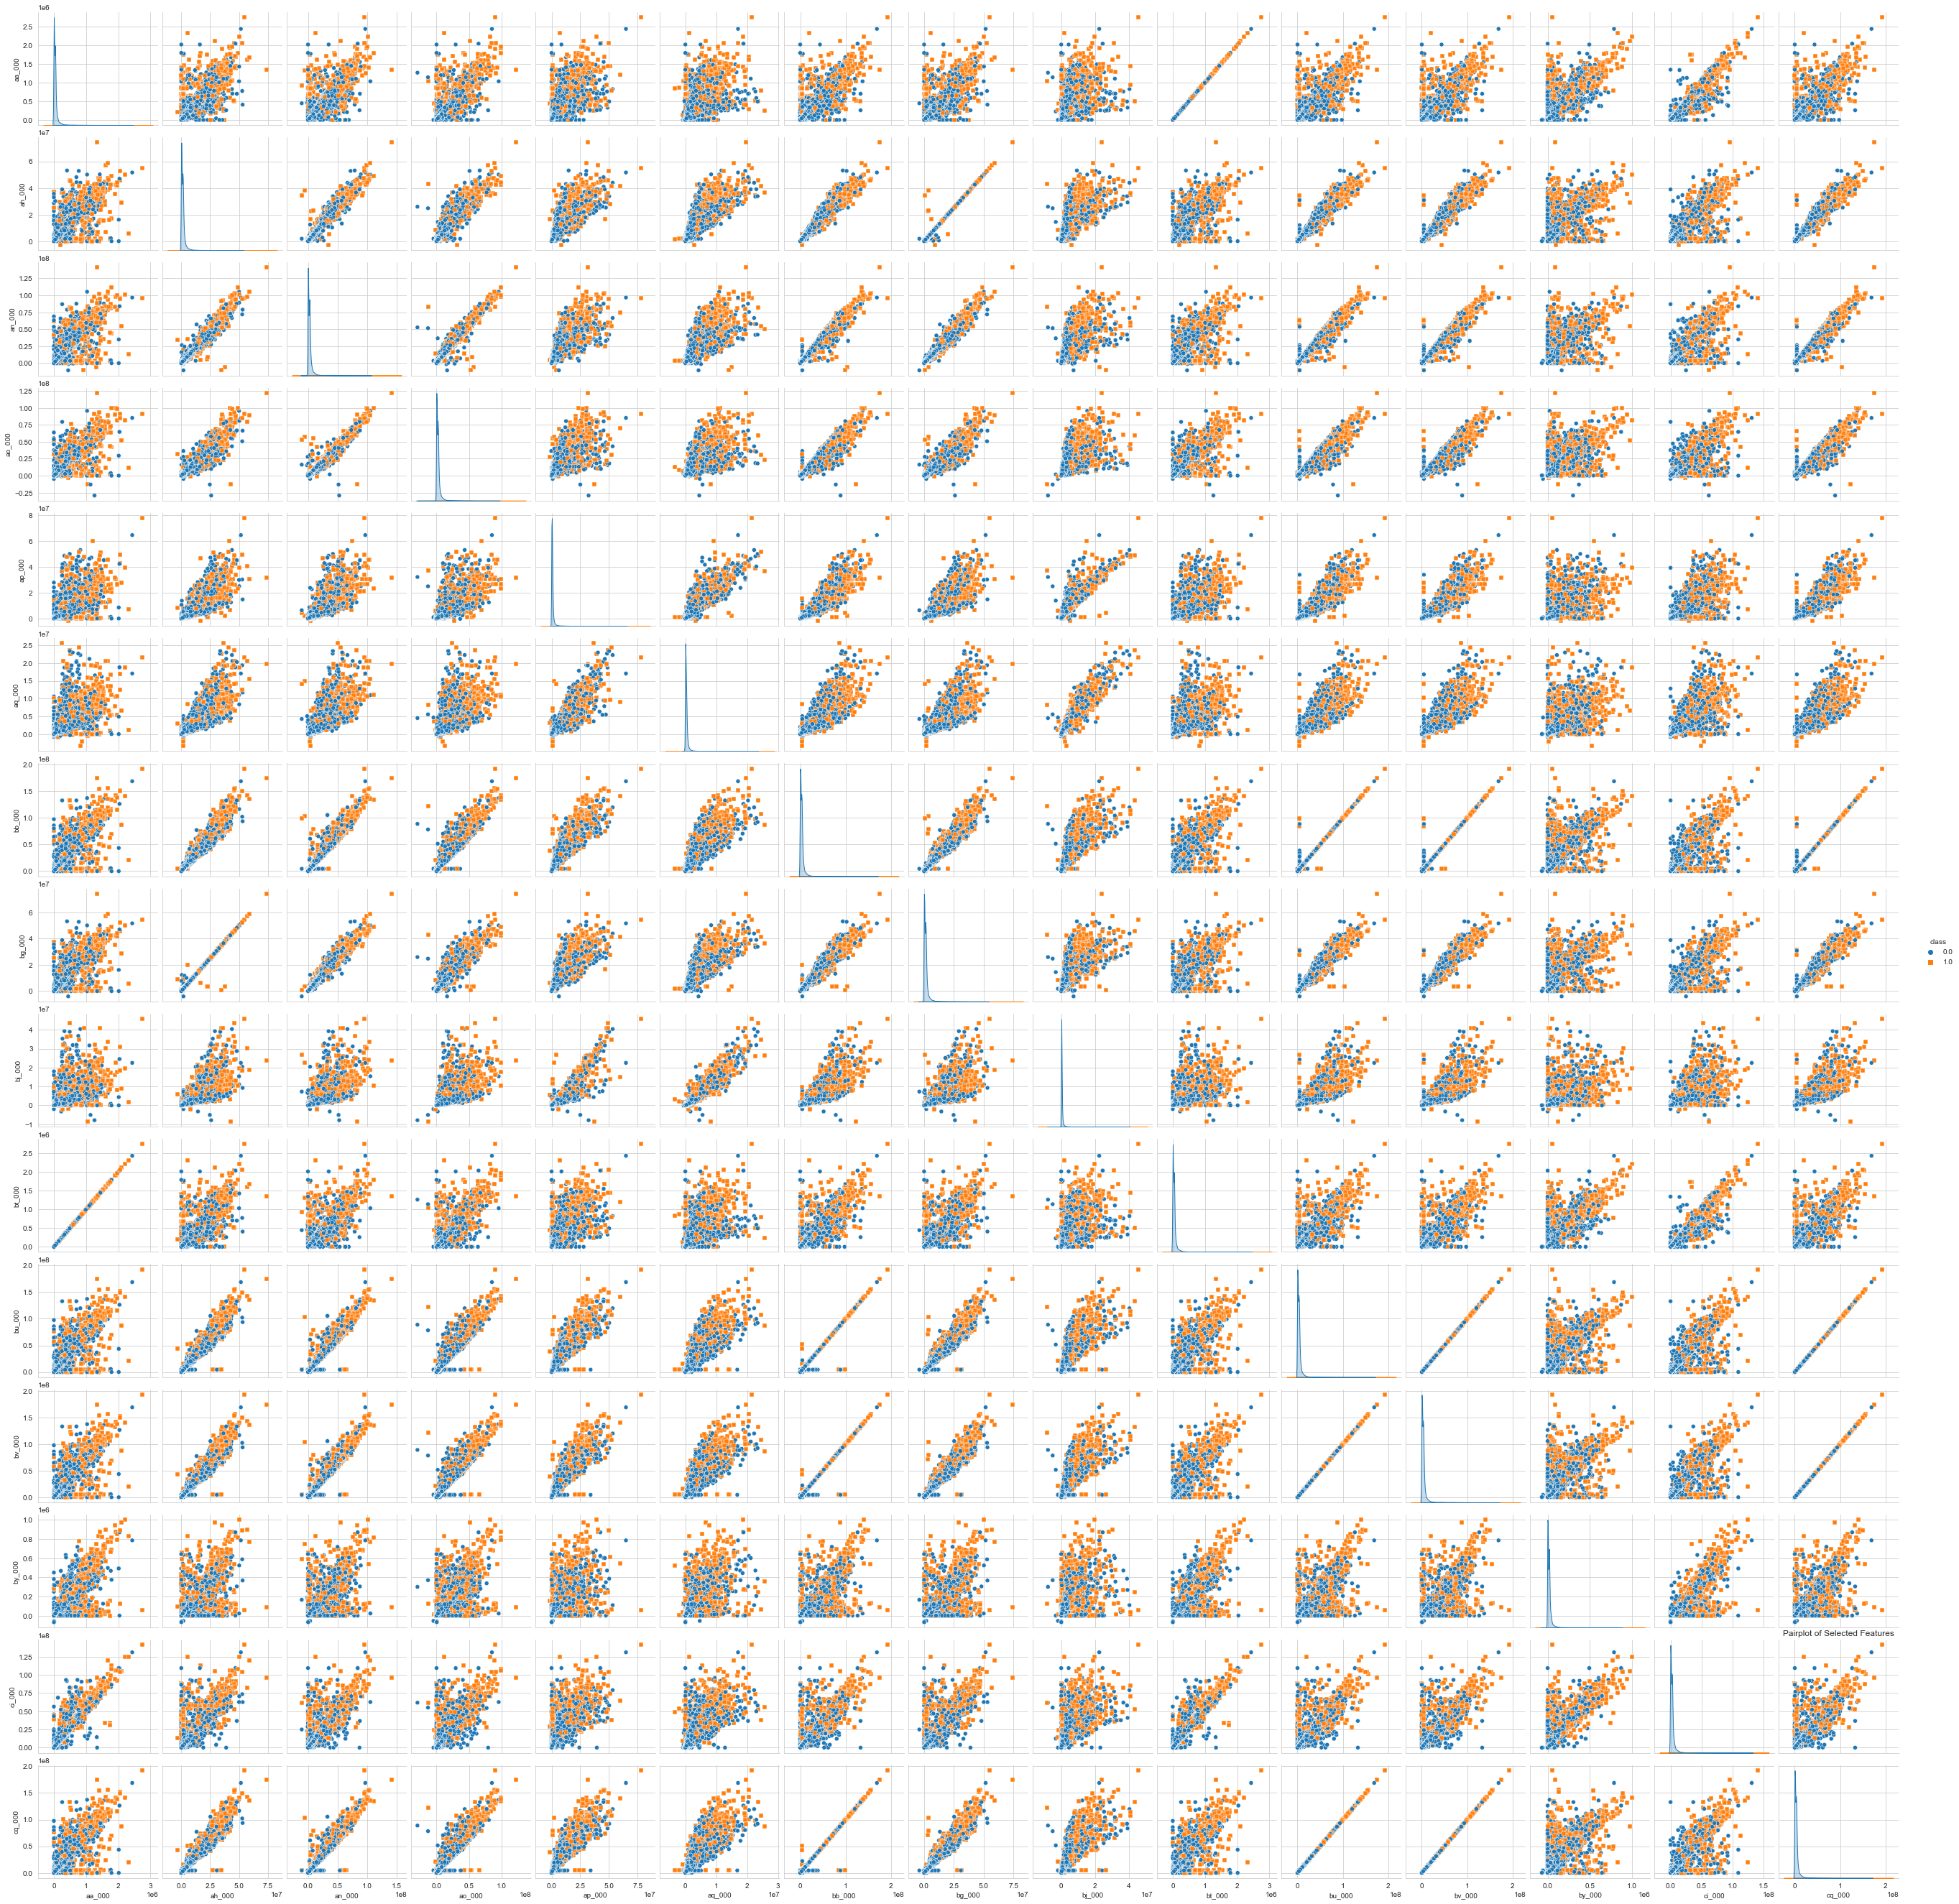

In [30]:
sns.pairplot(selected_features,hue='class', markers=['o','s'])
plt.title('Pairplot of Selected Features')

<AxesSubplot:>

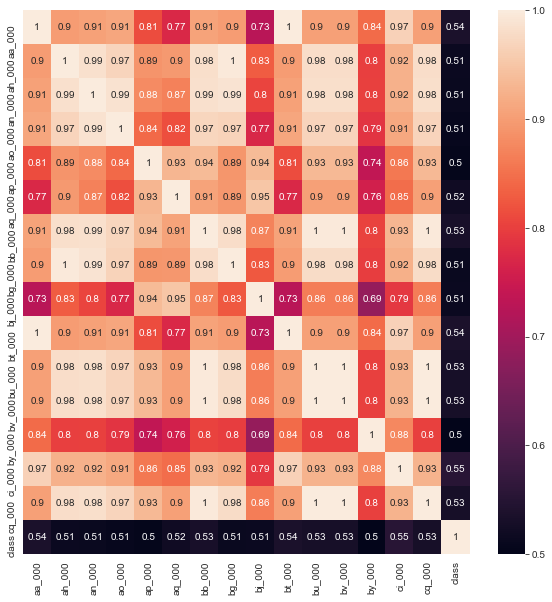

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(selected_features.corr(),color ='k',annot=True)

Observation- We can see from our pearson correlation & pairplots that  our features are highly correlated this may in fact imply a relationship between the components, if the components are highly correlated and reflect parts of an APS & Truck system we could build a predictive maintance model using this information.

<function matplotlib.pyplot.show(close=None, block=None)>

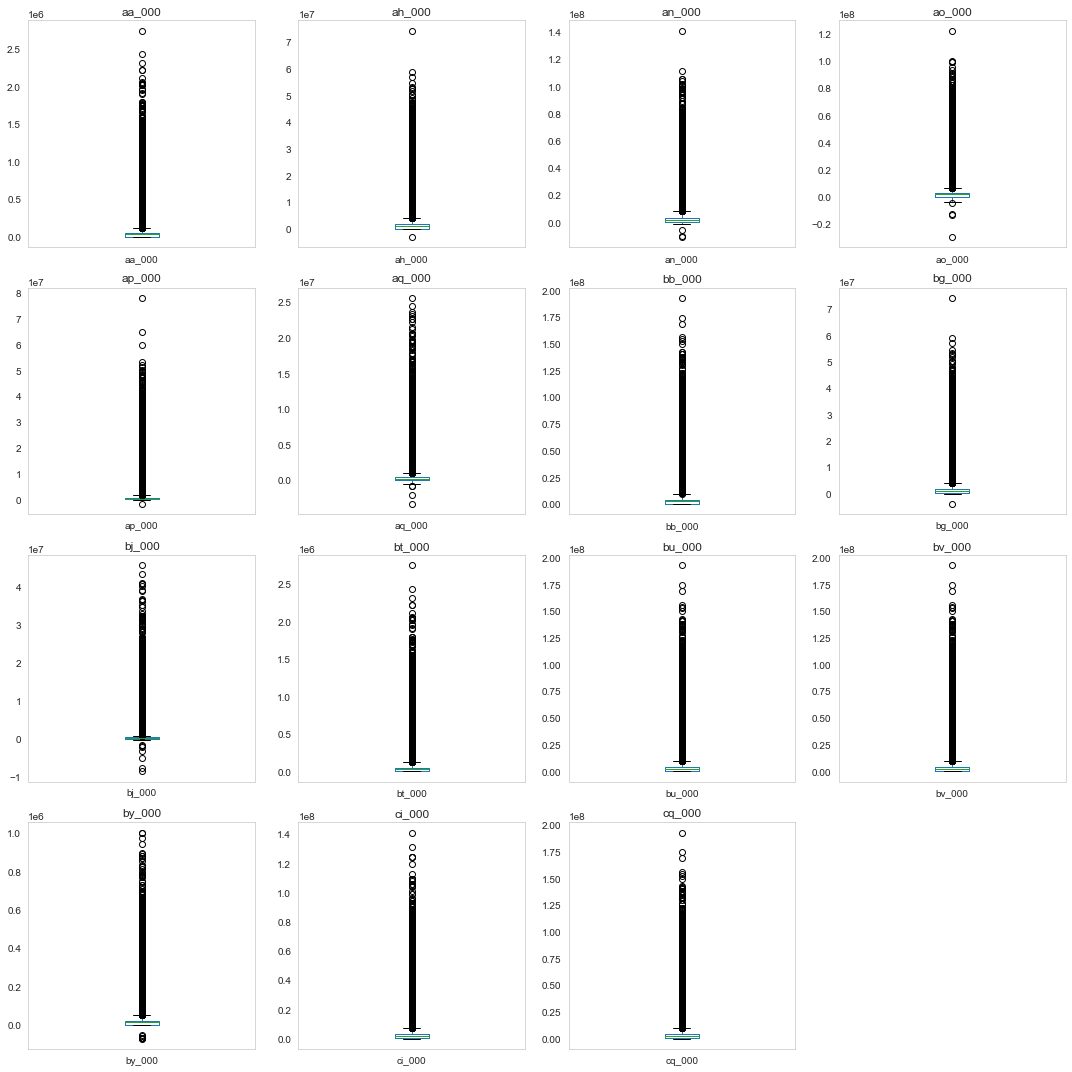

In [32]:
plt.figure(figsize=(15,15))

for i,col in enumerate(list(selected_features.columns.values)[:-1]):
    plt.subplot(4,4, i+ 1)
    selected_features.boxplot(column=col, vert=True)
    plt.grid()
    plt.title(col)
    
plt.tight_layout()
plt.show

# EDA Take Away


We have a highly imbalanced class variable which will probaly likely leas to a model that will be highly accurrate but not generalise well.

We have a high amount of missingness which we have dealt with through model based imputation.

We have identfied by measuring dispersion within our data by looking at the min & max values this informs that we will need to scale our data

We have observed by measuring central tendencies & mesures of variance that our datase is highly skewed with multile outliers. Our data does not follow a gaussian distribution and this will help in choosing to the correct scaling parameter.


Through our analysis We have identfied the features(components), which are  the most crucial for anticipating malfunctions with our Antilock Braking System (ABS). They were found using a feature selection procedure that assessed how useful they were in differentiating between cases of ABS system failure and those that weren't. These parts are more significant, which suggests that they have a major impact on the likelihood of ABS system failures. This would be the optimal solution to deal with the problem before us. The reason for this is this solution allows to identify faults before they occur. This data can be used for predictive maintance. By analysing the conditions and patterns that lead to system failures in the ABS system we can proactively address maintance issues  before they occur this will reduce costs and improve road safety.

# Principal Component Analysis

Principal Component Anaysis is the most popular dimensionality reduction used. In the the modern world a data analyst is faced with data that can have features for one instance we see this situation in image recognition for example. This can make it very difficult to find a solution to problems which we may face.

PCA effectively works by idenfying a hyerplane of the data it then caluclates eigen vectors(lines) which capture the most important relationships within the data. It then maps these eigen vectors on to a 2d or 3d space.

As humans when we move beyond 3 dimensions we find it hard to see patterns one of the benefits of pca it allows us to project our data on to a 2 d space which is important when we are conveying our result to non techinal stakeholders.

Geron, A. (2019) Hands-on machine learning with scikit-learn, keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. 2nd ed. Sebastopol, CA: O’Reilly Media.

In [33]:
train.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,13.273626,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,29.447863,0.000000e+00,191777.195723,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,2.733367,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,-5.774479,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [34]:
train.shape

(60000, 170)

In [35]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_std = scaler.fit_transform(train.drop(columns=["class"]))
imputer = KNNImputer(n_neighbors=4, weights="uniform")
X_std=imputer.fit_transform(X_std)
pca=PCA()
vecs=pca.fit_transform(X_std)

explained_variance=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance)
num_components=np.argmax(cumulative_variance >= 0.995)+1
print ('Number of components for 99.5% variance:', num_components)

pca=PCA(n_components=num_components)
vecs=pca.fit_transform(X_std)

columns =[f'Principal Component {i}' for i in range(1, num_components+1)]
reduced_df=pd.DataFrame(data=vecs,columns=columns)
train= pd.concat([reduced_df,train[['class']]],axis=1)
train

Number of components for 99.5% variance: 63


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 55,Principal Component 56,Principal Component 57,Principal Component 58,Principal Component 59,Principal Component 60,Principal Component 61,Principal Component 62,Principal Component 63,class
0,0.077520,-0.089701,0.023844,-0.028228,-0.001663,-0.033248,0.019428,0.007354,0.017496,0.011033,...,0.001377,0.003504,-0.000911,0.002627,-0.004083,-0.000988,0.002421,-0.001486,0.003989,0.0
1,-0.053003,0.135879,0.003612,-0.014828,0.001672,-0.001914,-0.000288,0.001168,0.003444,-0.004546,...,-0.001042,0.000664,0.001059,0.000932,0.002416,-0.000752,-0.000248,-0.000353,-0.001115,0.0
2,-0.049544,0.055519,0.004824,0.005866,-0.009660,0.013179,-0.003221,-0.001317,0.000647,0.000219,...,0.000383,-0.000007,0.000593,-0.000132,0.001248,0.000875,-0.000707,0.000540,-0.001236,0.0
3,-0.125201,0.114908,-0.003786,-0.001615,0.005884,-0.006257,0.000016,0.000177,-0.000133,0.001092,...,0.000225,-0.000116,-0.000186,-0.000329,-0.000021,0.000299,-0.000051,0.000067,0.000053,0.0
4,0.027185,-0.109236,0.001706,-0.009037,0.000727,-0.043781,0.009317,0.002979,0.012055,-0.008631,...,-0.000232,0.000470,-0.001928,-0.002096,-0.001670,0.000138,-0.002181,0.002565,-0.000462,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.210292,-0.244147,0.030974,0.004998,-0.027078,-0.009693,0.012365,-0.002449,0.016325,-0.040127,...,0.000606,0.006191,0.002983,-0.001704,-0.001619,0.002591,0.001598,0.000470,-0.001104,0.0
59996,-0.113819,0.074329,-0.004181,0.000505,0.003641,0.000480,-0.002408,-0.000013,-0.000910,0.001964,...,0.000238,-0.000428,-0.000084,-0.000394,0.000094,0.000223,-0.000025,0.000141,0.000032,0.0
59997,-0.123292,0.107758,-0.003882,-0.001367,0.005816,-0.005414,-0.000346,0.000368,-0.000232,0.001150,...,0.000237,-0.000173,-0.000177,-0.000338,0.000006,0.000284,-0.000108,0.000121,0.000062,0.0
59998,0.032888,0.118996,0.048110,-0.043054,-0.022154,0.000473,-0.006289,-0.004937,-0.006688,-0.047044,...,0.001522,-0.001429,0.009781,0.004637,-0.002289,0.007974,0.001681,-0.002967,-0.002653,0.0


unknown,unknown.Feature Selection..Available at: https://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination [Accesed] 03-11-2023]

We have used pca to reduces our features to 78 while maintaing 99.5% of the variance or pattern within our data. We have used min max scaler to scale our data because our data was skewed and highly dispersed. Originally I had used standard scaler and reduced my components to 82 by using min max scaler which is designed to be for skewed data i reduced my features by 4. standardscaler is designed to be used for a normal distibution.

In [36]:
train.head()


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 55,Principal Component 56,Principal Component 57,Principal Component 58,Principal Component 59,Principal Component 60,Principal Component 61,Principal Component 62,Principal Component 63,class
0,0.077520,-0.089701,0.023844,-0.028228,-0.001663,-0.033248,0.019428,0.007354,0.017496,0.011033,...,0.001377,0.003504,-0.000911,0.002627,-0.004083,-0.000988,0.002421,-0.001486,0.003989,0.0
1,-0.053003,0.135879,0.003612,-0.014828,0.001672,-0.001914,-0.000288,0.001168,0.003444,-0.004546,...,-0.001042,0.000664,0.001059,0.000932,0.002416,-0.000752,-0.000248,-0.000353,-0.001115,0.0
2,-0.049544,0.055519,0.004824,0.005866,-0.009660,0.013179,-0.003221,-0.001317,0.000647,0.000219,...,0.000383,-0.000007,0.000593,-0.000132,0.001248,0.000875,-0.000707,0.000540,-0.001236,0.0
3,-0.125201,0.114908,-0.003786,-0.001615,0.005884,-0.006257,0.000016,0.000177,-0.000133,0.001092,...,0.000225,-0.000116,-0.000186,-0.000329,-0.000021,0.000299,-0.000051,0.000067,0.000053,0.0
4,0.027185,-0.109236,0.001706,-0.009037,0.000727,-0.043781,0.009317,0.002979,0.012055,-0.008631,...,-0.000232,0.000470,-0.001928,-0.002096,-0.001670,0.000138,-0.002181,0.002565,-0.000462,0.0


In [37]:
train['class'] =train['class'].astype(int)

In [38]:
train.head(1)

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 55,Principal Component 56,Principal Component 57,Principal Component 58,Principal Component 59,Principal Component 60,Principal Component 61,Principal Component 62,Principal Component 63,class
0,0.07752,-0.089701,0.023844,-0.028228,-0.001663,-0.033248,0.019428,0.007354,0.017496,0.011033,...,0.001377,0.003504,-0.000911,0.002627,-0.004083,-0.000988,0.002421,-0.001486,0.003989,0


In [48]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

X=train.drop(columns=['class'])
y=train['class']
k=15
classifier=LogisticRegression()
selector=RFE(estimator=classifier,n_features_to_select=k)
X_selected=selector.fit_transform(X,y)
selected_feature_indices=selector.get_support(indices=True)
selected_feature_names=X.columns[selected_feature_indices]
selected_features=pd.DataFrame(X_selected,columns=selected_feature_names)
selected_features['class'] = y.values

We need to remove our components to a smaller number if we consult the scikit documentaion  we can use a feature selection called Recursive feature Elimnation(RFE).In machine learning, recursive feature elimination (RFE) is a feature selection method used to extract the most pertinent characteristics from a given dataset. The process involves iteratively fitting the model using subsets of features, assigning a value to each feature, and removing the least significant features until the target feature count is attained. Our aim is to create a new dataframe with the most important features and carry out pca again. We have used a descion tree classifier as it is suitable for skewed data and fits well to data that is not linear based.

In [49]:
selected_features.head()

,Principal Component 1,Principal Component 4,Principal Component 6,Principal Component 12,Principal Component 13,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 20,Principal Component 24,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 31,Principal Component 50,class
0,0.077520,-0.028228,-0.033248,0.015680,-0.021694,-0.003036,0.003528,0.008651,-0.016273,0.002127,0.016650,0.001755,0.004716,-0.005399,-0.000563,0
1,-0.053003,-0.014828,-0.001914,-0.002851,0.001982,0.003397,-0.003937,-0.001435,-0.002322,-0.002654,0.001074,-0.001658,-0.000794,-0.001116,-0.000073,0
2,-0.049544,0.005866,0.013179,-0.005615,-0.003737,-0.003245,0.005857,0.000962,-0.006226,0.000625,-0.003930,0.000133,-0.000583,0.000049,0.000268,0
3,-0.125201,-0.001615,-0.006257,0.000836,0.000452,-0.000755,0.000228,0.001242,0.001106,0.000241,0.000304,0.000068,-0.000541,-0.000215,-0.000007,0
4,0.027185,-0.009037,-0.043781,0.007643,0.009643,0.006770,-0.012377,-0.005834,0.004281,0.000278,-0.000806,-0.008536,0.001749,-0.000133,0.000263,0


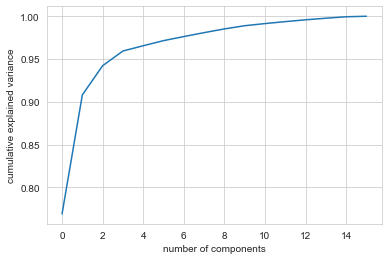

In [50]:
selected_new = selected_features.drop(selected_features["class"])
pca = PCA().fit(selected_features) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

Observation - We can see form our different techniques that we have reduced our original 170 features to 4 components while capturing all of the variance held within the data.

In [51]:
pca = PCA(4)
projected = pca.fit_transform(selected_new) 

In [52]:
projected.shape

(59998, 4)

In [53]:
scania_pca = pd.DataFrame(projected, columns =['C1', 'C2','C3','C4'])

In [54]:
scania_pca.head()

,C1,C2,C3,C4
0,-0.052266,-0.001407,0.006255,0.012916
1,-0.123092,-0.028410,-0.003105,-0.005049
2,0.019749,0.023091,-0.008687,-0.044729
3,-0.046547,0.001101,-0.004562,0.004374
4,-0.124343,-0.028631,-0.002487,-0.000644


In [55]:
scania_pca["class"] = selected_features["class"]

In [56]:
scania_pca.head()

,C1,C2,C3,C4,class
0,-0.052266,-0.001407,0.006255,0.012916,0
1,-0.123092,-0.028410,-0.003105,-0.005049,0
2,0.019749,0.023091,-0.008687,-0.044729,0
3,-0.046547,0.001101,-0.004562,0.004374,0
4,-0.124343,-0.028631,-0.002487,-0.000644,0


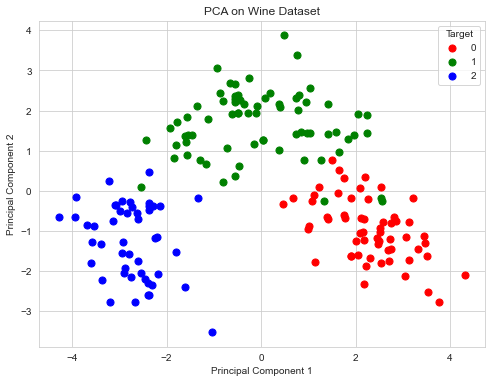

In [57]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA


# load the dataset
wine = load_wine()

# convert the object in a pandas dataframe
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target
# normalize data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df.drop(columns=["target"]))
# PCA object specifying the number of principal components desired
pca = PCA(n_components=2) # we want to project two dimensions so that we can visualize them!

# We fit the PCA model on standardized data
vecs = pca.fit_transform(X_std)
reduced_df = pd.DataFrame(data=vecs, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([reduced_df, df[['target']]], axis=1)
plt.figure(figsize=(8, 6)) # set the size of the canvas
targets = list(set(final_df['target'])) # we create a list of possible targets (there are 3)
colors = ['r', 'g', 'b'] # we define a simple list of colors to differentiate the targets

# loop to assign each point to a target and color
for target, color in zip(targets, colors):
     idx = final_df['target'] == target
     plt.scatter(final_df.loc[idx, 'Principal Component 1'], final_df.loc[idx, 'Principal Component 2'], c=color, s=50)

# finally, we show the graph
plt.legend(targets, title="Target", loc='upper right')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.show()

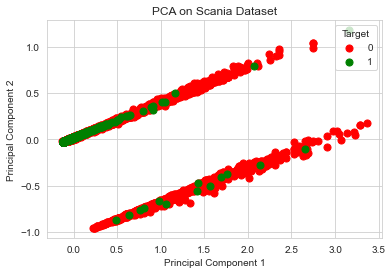

In [58]:
plt.figure(figsize=(6, 4)) # set the size of the canvas
targets = list(set(scania_pca['class'])) # we create a list of possible targets (there are 3)
colors = ['r', 'g', 'b'] # we define a simple list of colors to differentiate the targets

# loop to assign each point to a target and color
for target, color in zip(targets, colors):
     idx = scania_pca['class'] == target
     plt.scatter(scania_pca.loc[idx, 'C1'], scania_pca.loc[idx, 'C2'], c=color, s=50)

# finally, we show the graph
plt.legend(targets, title="Target", loc='upper right')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Scania Dataset')
plt.show()

Observation- By ways of benchmarking we completed a pca on the wine dataset and projected in to a 2 dimensional space. We can see from this dataset are linearly seperated.However when we compare our pca we can see that our data is overlapping which suggests our data is non linear. This can help us as when employing our models such as as linear classification may not work well. Models such as decision trees and knn will work better as the math which supports does not depend on a linear relationship between the data.

Michelangiolo Mazzeschi,2021.Exploring Dataset With Data Visualization: Wine Classification Using PCA..Available at: https://medium.com/towards-artificial-intelligence/exploring-dataset-with-data-visualization-wine-classification-using-pca-d133427183fb [Accesed] 03-11-2023]

In [59]:
scania_pca.head()

,C1,C2,C3,C4,class
0,-0.052266,-0.001407,0.006255,0.012916,0
1,-0.123092,-0.028410,-0.003105,-0.005049,0
2,0.019749,0.023091,-0.008687,-0.044729,0
3,-0.046547,0.001101,-0.004562,0.004374,0
4,-0.124343,-0.028631,-0.002487,-0.000644,0


In [60]:
X=scania_pca.drop(columns=['class'])
y=scania_pca['class']

In [61]:
X_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=1)

# Prepare Our Model

In [62]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


In [63]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.983333 (0.000002)
LDA: 0.983333 (0.000002)
KNN: 0.983213 (0.000160)
CART: 0.967522 (0.003303)
NB: 0.964855 (0.006461)


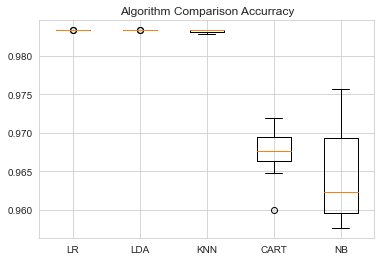

In [64]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison Accurracy')
pyplot.show()

In [65]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(x_test)
f1_macro=f1_score(y_test,y_pred,average='macro')
print('F1 Macro Score:', f1_macro)

classification_rep=classification_report(y_test,y_pred)
print('Classification Report:\n', classification_rep)

conf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n', conf_matrix)

F1 Macro Score: 0.49579831932773105
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     17700
           1       0.00      0.00      0.00       300

    accuracy                           0.98     18000
   macro avg       0.49      0.50      0.50     18000
weighted avg       0.97      0.98      0.98     18000

Confusion Matrix:
 [[17700     0]
 [  300     0]]


F1 Macro Score: As we had previously identfied the cost of misclassification was high With an overall performance score of 0.4959, the model is not performing up to par. 

Class 1 Precision and Recall: The model nearly always predicts incorrectly when it comes to class 1, as evidenced by the precision of 0. Additionally, the recall is zero, meaning that the majority of real class 1 cases were overlooked by the model. These findings imply that class 1 samples are not being correctly identified by the model.

It could be easy to look at the accuracy and beleive our model has performed well, however due to the fact that our classes were so inbalanced this was always going to be the case. Our preferred metric was F1 macro has performed poorly. A solution to this when building models would to use tresholds, when working with imbalanced datasets, it's a technique to improve the alignment between your model's predictions and your business objectives. However, to find the ideal balance between recall and precision, selecting the threshold values frequently calls for experimentation and domain knowledge.



# Conclusion

We have shown from our analysis that using PCA is not the optimal solution fot the business problem we were faced with. Pca ia an effective dimensional reduction in certain circumstances such as in image recgonigtion. The data we had related to components sensors on a truck. The abilty to understand how each component relates to the sucess or failure of the APS on the truck is critical to building a succesful Model. We lose this ability when we use pca. I would recommend building a model that uses a feature such as Recursive feature elimnation to reduce our features while us to perserve the ability to undestand the patterns of the indivdual components. I would recommend that an investment be made in building data analytics models which have been suggested to buils predictive maintance models which would reduce any costa associated with the failure of the APS system. 

In essences when we use PCA we lose the ability to understand the information as it pertains to this particular business problem 




# Bibliography

unknown,unknown.Feature selection..Available at: https://scikit-learn.org/stable/modules/feature_selection.html [Accesed] 29-10-2023]

https://medium.com/towards-data-science/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038 [Accesed] 26-10-2023]

unknown,unknown.Imputation..Available at: Ref:https://scikit-learn.org/stable/modules/impute.html#iterative-imputer [Accesed] 27-10-2023]

Geron, A. (2019) Hands-on machine learning with scikit-learn, keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. 2nd ed. Sebastopol, CA: O’Reilly Media.

unknown,unknown.Feature Selection..Available at: https://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination [Accesed] 03-11-2023]

Michelangiolo Mazzeschi,2021.Exploring Dataset With Data Visualization: Wine Classification Using PCA..Available at: https://medium.com/towards-artificial-intelligence/exploring-dataset-with-data-visualization-wine-classification-using-pca-d133427183fb [Accesed] 03-11-2023]